# **PCA**







# Step 1 : import libraries

In [205]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Importing the data set

### Import the dataset and distributing the dataset into X and y components for data analysis.




In [206]:
diabetes = load_breast_cancer(as_frame=True)
df = diabetes.frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [207]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [208]:
df.shape

(569, 31)

# Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [209]:
X = df[diabetes['feature_names']]
y = df['target']
X.shape, y.shape

((569, 30), (569,))

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [211]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((381, 30), (188, 30), (381,), (188,))

# Step 4: Feature Scaling
### Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
SX_train = scaler.fit_transform(X_train)
SX_test = scaler.transform(X_test)
# Sy_train = scaler.fit_transform(y_train)
# Sy_test = scaler.transform(y_test)
SX_train.shape, SX_test.shape

((381, 30), (188, 30))

# Step 5: Applying PCA function
### Applying the PCA function into the training and testing set for analysis.




In [213]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=2).fit(SX_train)
x_pca = pca.transform(SX_train)
x_test_pca = pca.transform(SX_test)
# df_pca1
#  = pd.DataFrame(x_pca,
#                       columns=['pc{}'.
#                       format(i+1) 
#                       for i in range(n_components)])
# print(df_pca1)
x_pca

array([[ 2.81157075e+00,  1.26641350e+00],
       [-1.34806750e+00,  4.56034075e-01],
       [ 4.58592243e+00, -2.24322441e+00],
       [-2.54432528e+00, -7.14424969e-01],
       [-1.44716297e+00,  6.16941946e-01],
       [-4.65544710e+00, -7.85536973e-01],
       [-2.92721610e+00,  3.29400058e-01],
       [-4.00244625e-04, -3.40815157e+00],
       [-1.51962690e+00, -1.11128254e+00],
       [-4.02596838e+00,  1.09477437e+00],
       [ 7.03419922e+00,  1.98536180e+00],
       [-3.80098864e+00, -2.77920005e-01],
       [-3.32284461e+00, -3.10997919e+00],
       [-1.06888868e+00,  5.62164262e+00],
       [ 9.07623063e+00,  2.07835977e+00],
       [-2.61929532e+00, -1.10770919e+00],
       [ 4.94745537e+00, -1.20589655e+00],
       [ 4.85428143e+00, -2.74523082e+00],
       [-3.06979402e+00, -1.33403284e-01],
       [-3.35875515e+00, -5.39072302e-01],
       [-9.52780827e-01,  8.76238239e-01],
       [-5.95980104e-01, -8.12751239e-01],
       [-2.64893343e+00,  2.30509233e+00],
       [-3.

# Step 6: Fitting Logistic Regression To the training set




In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
lr = LogisticRegression()
lr.fit(x_pca, y_train)

LogisticRegression()

# Step 7: Predicting the test set result




In [215]:
pred = lr.predict(x_test_pca)

In [216]:
print(classification_report(pred,y_test))
# print('Accuracy : ')
# print(accuracy_score(pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.97      0.98      0.97       119

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



# Step 8: Making the confusion matrix




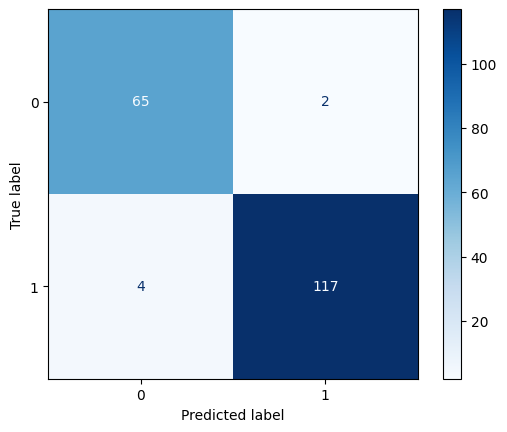

In [217]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(lr, x_test_pca, y_test, cmap='Blues')

# Step 9: Predicting the training set result




In [218]:
lr.predict(x_pca)

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,

# Step 10: Visualizing the Test set results




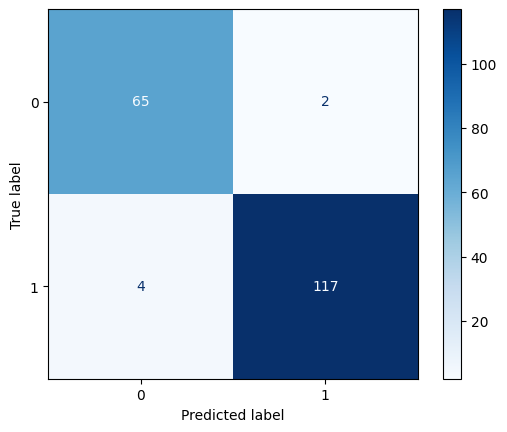

In [182]:
disp = ConfusionMatrixDisplay.from_estimator(lr, x_test_pca, y_test, cmap='Blues')

# **Well Done :)**
Now let's practice!